# Training the model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("../data2/Berlin_Marathon_data_1974_2019.csv")
data.head()


C:\Users\cordo\AppData\Local\Temp\ipykernel_4556\219196269.py:1: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../data2/Berlin_Marathon_data_1974_2019.csv")


,YEAR,COUNTRY,GENDER,AGE,TIME
0,1974,NaN,male,L1,02:44:53
1,1974,NaN,male,L2,02:46:43
2,1974,NaN,male,L2,02:48:08
3,1974,NaN,male,L,02:48:40
4,1974,NaN,male,L1,02:49:01


In [4]:
data_weather = pd.read_csv("../data2/Berlin_Marathon_weather_data_since_1974.csv")
data_weather.head()

,YEAR,PRECIP_mm,SUNSHINE_hrs,CLOUD_hrs,ATMOS_PRESS_mbar,AVG_TEMP_C,MAX_TEMP_C,MIN_TEMP_C
0,1974,0.0,0.2,7.0,1009.5,5.4,8.8,1.1
1,1975,4.2,9.4,3.0,1011.4,14.3,20.1,9.5
2,1976,3.0,10.2,3.3,1010.4,12.8,18.0,7.3
3,1977,11.2,0.0,8.0,1013.1,9.7,12.5,7.4
4,1978,1.8,2.7,6.0,1000.6,11.2,14.5,9.4


In [5]:
# Drop rows where the TIME column is missing or empty
filtered_data = data.dropna(subset=['TIME'])

# If TIME is stored as a string, filter out any empty strings
filtered_data = filtered_data[filtered_data['TIME'] != "no time"]

# Convert TIME to total seconds for regression
filtered_data['TIME'] = pd.to_timedelta(filtered_data['TIME']).dt.total_seconds()

# Assign filtered_data back to data
data = filtered_data

# Display the first few rows to verify the transformation
data.head()


,YEAR,COUNTRY,GENDER,AGE,TIME
0,1974,NaN,male,L1,9893.0
1,1974,NaN,male,L2,10003.0
2,1974,NaN,male,L2,10088.0
3,1974,NaN,male,L,10120.0
4,1974,NaN,male,L1,10141.0


In [6]:
combined_data = pd.merge(data, data_weather, on='YEAR', how='inner')

# Display the combined DataFrame
combined_data.head()

,YEAR,COUNTRY,GENDER,AGE,TIME,PRECIP_mm,SUNSHINE_hrs,CLOUD_hrs,ATMOS_PRESS_mbar,AVG_TEMP_C,MAX_TEMP_C,MIN_TEMP_C
0,1974,NaN,male,L1,9893.0,0.0,0.2,7.0,1009.5,5.4,8.8,1.1
1,1974,NaN,male,L2,10003.0,0.0,0.2,7.0,1009.5,5.4,8.8,1.1
2,1974,NaN,male,L2,10088.0,0.0,0.2,7.0,1009.5,5.4,8.8,1.1
3,1974,NaN,male,L,10120.0,0.0,0.2,7.0,1009.5,5.4,8.8,1.1
4,1974,NaN,male,L1,10141.0,0.0,0.2,7.0,1009.5,5.4,8.8,1.1


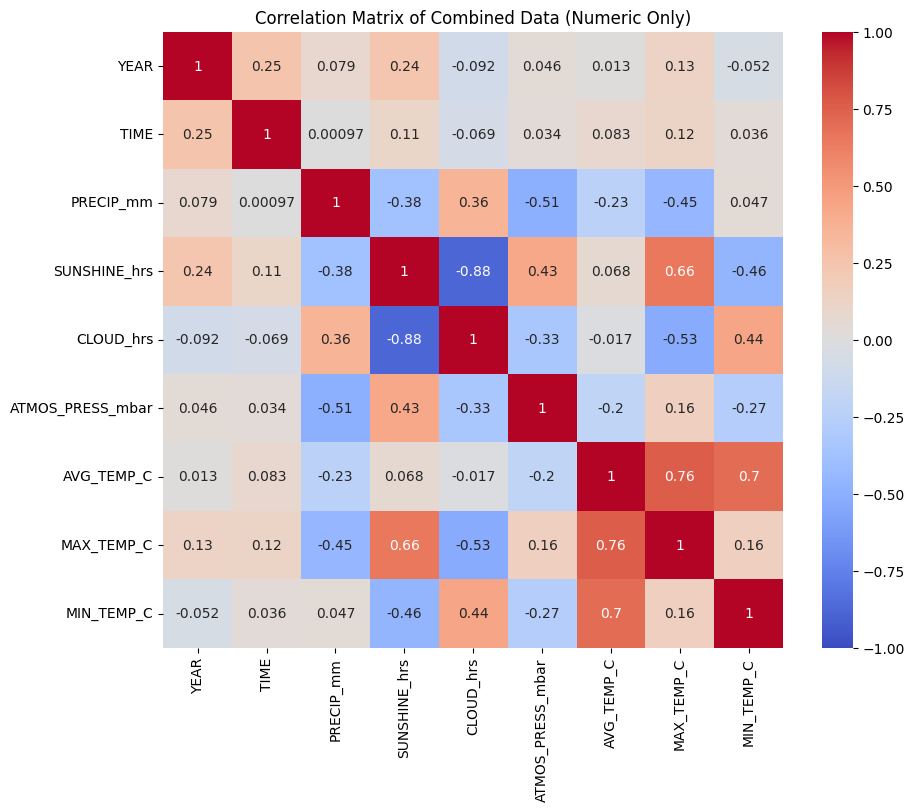

In [7]:
# Selecting only numeric columns for the correlation matrix
numeric_data = combined_data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix as a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Combined Data (Numeric Only)')
plt.show()


In [8]:
y = combined_data['TIME']
X = combined_data[['GENDER', 'AGE', 'ATMOS_PRESS_mbar', 'AVG_TEMP_C']]
X = pd.get_dummies(X, columns=['GENDER', 'AGE'], drop_first=True)
X.head()

,ATMOS_PRESS_mbar,AVG_TEMP_C,GENDER_male,AGE_20,AGE_30,AGE_35,AGE_40,AGE_45,AGE_50,AGE_55,...,AGE_DH,AGE_DJ,AGE_L,AGE_L1,AGE_L2,AGE_L3,AGE_L4,AGE_M,AGE_M0,AGE_M<
0,1009.5,5.4,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,1009.5,5.4,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,1009.5,5.4,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,1009.5,5.4,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,1009.5,5.4,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.svm import LinearSVR
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Convert categorical variables using one-hot encoding (if needed)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('regr', LinearRegression())  # Default model, will be overridden by GridSearch
])

search_space = [
    # {'regr': [LinearRegression()], 'regr__fit_intercept': [True, False]},
    # {'regr': [tree.DecisionTreeRegressor()], 
    # 'regr__max_depth': [None, 10, 20]},

    # {'regr': [RandomForestRegressor()],
    # 'regr__n_estimators': [10, 50, 100]},
    # 'regr__max_depth': [None, 10, 20],
    # 'regr__max_features': ['auto', 'sqrt', 'log2', None, 0.2, 0.5]},

    {'regr': [LinearSVR()],
    'regr__epsilon': [0.01, 0.1]}
]

gs = GridSearchCV(pipeline, param_grid = search_space, scoring = 'neg_mean_squared_error', cv = 5)
gs.fit(X_train, y_train)

best_pipeline = gs.best_estimator_
best_regression_model = best_pipeline.named_steps['regr']
best_model_hyperparameters = best_regression_model.get_params()

print("> Best Regresion Model:", best_regression_model)
print("> Best Hyper-parameters:", best_model_hyperparameters)

# Print the best parameters and the best score
print("Best parameters found: ", gs.best_params_)
print("Best score (RMSE): ", (-gs.best_score_) ** 0.5)

# Predict on the test set
y_pred = gs.best_estimator_.predict(X_test)

# Evaluate the model performance on the test set
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Test RMSE: ", rmse)


c:\github\Semestre_X\MLE\backendMarathonPredict\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\github\Semestre_X\MLE\backendMarathonPredict\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\github\Semestre_X\MLE\backendMarathonPredict\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\github\Semestre_X\MLE\backendMarathonPredict\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\github\Semestre_X\MLE\backendMarathonPredict\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


> Best Regresion Model: LinearSVR(epsilon=0.1)
> Best Hyper-parameters: {'C': 1.0, 'dual': 'auto', 'epsilon': 0.1, 'fit_intercept': True, 'intercept_scaling': 1.0, 'loss': 'epsilon_insensitive', 'max_iter': 1000, 'random_state': None, 'tol': 0.0001, 'verbose': 0}
Best parameters found:  {'regr': LinearSVR(), 'regr__epsilon': 0.1}
Best score (RMSE):  2472.454547680496
Test RMSE:  2393.0726130163143


c:\github\Semestre_X\MLE\backendMarathonPredict\venv\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\github\Semestre_X\MLE\backendMarathonPredict\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


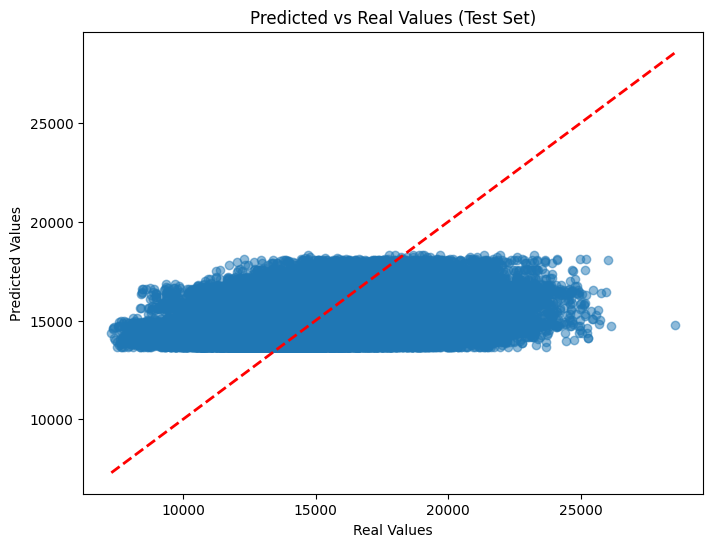

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Real Values (Test Set)")
plt.show()

In [11]:
X_new = pd.DataFrame({
    'GENDER': ['Male'],  # Replace with the actual gender value
    'AGE': [30],         # Replace with the actual age value
    'ATMOS_PRESS_mbar': 1,
    'AVG_TEMP_C': 1,
})

# Apply the same dummy encoding to X_new as used for X during training
X_new_encoded = pd.get_dummies(X_new, columns=['GENDER', 'AGE'], drop_first=True)

# Align X_new_encoded columns with X (fill missing columns with 0)
X_new_encoded = X_new_encoded.reindex(columns=X.columns, fill_value=0)

# Make the prediction
y_pred_single = gs.best_estimator_.predict(X_new_encoded)
y_pred_single

array([257.15178876])

In [12]:
import joblib

# Save the best estimator (the pipeline with the best model and preprocessing steps)
joblib.dump(gs.best_estimator_, 'best_model_pipeline.joblib')
print("Model saved as 'best_model_pipeline.joblib'")


Model saved as 'best_model_pipeline.joblib'
